In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing libraries:

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,datasets,layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Reading the dataset:

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [ ]:
x = df.iloc[:,0:8]
y = df["Outcome"]

In [ ]:
# normalizing values using fir_transform()
x = StandardScaler().fit_transform(x)

Splitting data into traing and testing data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

Sequential model:

In [ ]:
model = models.Sequential()
# First hidden layer:
model.add(layers.Dense(100,activation="relu"))
# Second hidden layer:
model.add(layers.Dense(50,activation="relu"))
# Third hidden layer:
model.add(layers.Dense(25,activation="relu"))
# Fourth hidden layer: 
model.add(layers.Dense(12,activation="relu"))
# Fifth hidden layer: 
model.add(layers.Dense(6,activation="relu"))
# Output layer:
model.add(layers.Dense(1,activation="sigmoid"))   # Output will be between Yes or no(binary) so only 1 neuron

In [ ]:
# optimizer = adam
# binary_crossentropy function used to compute the cross-entropy loss between true labels and predicted labels
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

Data fitting in the model:

In [ ]:
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
22/22 [==============================] - 1s 13ms/step - loss: 0.6554 - accuracy: 0.6570 - val_loss: 0.5854 - val_accuracy: 0.8052
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.7048 - val_loss: 0.4676 - val_accuracy: 0.8312
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 0.5125 - accuracy: 0.7685 - val_loss: 0.3955 - val_accuracy: 0.8312
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 0.4776 - accuracy: 0.7641 - val_loss: 0.3739 - val_accuracy: 0.8701
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4599 - accuracy: 0.7931 - val_loss: 0.3878 - val_accuracy: 0.8182
Epoch 6/50
22/22 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.7786 - val_loss: 0.3726 - val_accuracy: 0.8312
Epoch 7/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4449 - accuracy: 0.7902 - val_loss: 0.3748 - val_accuracy: 0.8182
Epoch 8/50
22/22 [=

In [ ]:
result = model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.5743 - accuracy: 0.7662


Graphical representaton of decrement of loss with epochs:

3/3 - 0s - loss: 0.5743 - accuracy: 0.7662 - 32ms/epoch - 11ms/step


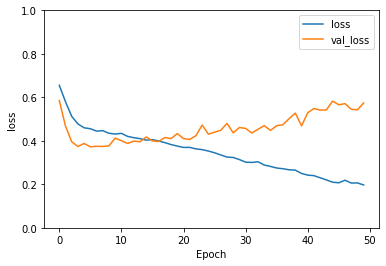

In [ ]:
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend(['loss', 'val_loss'], loc='upper right')

Graphical representaton of change in val_accuracy with epochs:

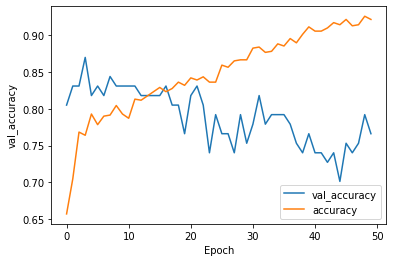

In [ ]:
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.legend(['val_accuracy', 'accuracy'], loc='lower right')